 ###  import librrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 ###  read file

In [2]:
pathcsv = '../data/data_clean.csv'

 ###  select data

In [3]:
columns = [
'temp_Celsius',
'time_dayofweek',
#'time_year',
#'time_month',
#'time_dayofmonth',
'time_hour',
#'rain_1h',
#'snow_1h',
#'clouds_all',
'traffic_volume'
]

### function  read data and convert to matrix

In [4]:
def redData(path):
    # read selected data
    data = pd.read_csv(path,usecols=columns)
    
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)
    
    # inset column One for theta[0]
    ones = np.ones((x.shape[0],1))
    x = np.hstack([ones, x])
    
    return x,y,data

### function plot best fit line + data

In [5]:
def plotOne(_data,_theta,xName,yName):
    x = np.linspace(_data[xName].min(), _data[yName].max(), 100)
    
    # _theta = np.hstack(np.array(_theta))
    # f = _theta[0] + _theta[columns.index(xName)+1] * x + ( _theta[columns.index(yName)+1] *  x)
    f = _theta[0, 0] + (_theta[0, 1] * x)
    
    # draw the line
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(x, f, 'r', label='Regression')
    ax.scatter(_data[xName], _data[yName],s=10, c='b', marker='.', label='Traning Data')
    ax.legend(loc=2)
    ax.set_xlabel(xName)
    ax.set_ylabel(yName)
    ax.set_title('Regression : '+xName+' vs '+yName )
    plt.show()

### Cost function

In [6]:
def cost_function(x, y, theta):
    z = np.power(((x * theta.T) - y), 2)
    return np.sum(z) / (2 * len(x))

In [7]:
def plot_cost(_costs):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(np.arange(len(_costs)), _costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs. Training')
    plt.show()

# Regression Problem Linear

### gradientDescent function

In [8]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
        theta = temp
        cost[i] = cost_function(x, y, theta)
    return theta, cost


### run

theta 0: [[0. 0. 0. 0.]]
alpha: 0.9
iters: 40
theta of gradientDescent : [[ 0.27100268  0.1471173  -0.11551849  0.30369175]]
cost  of gradientDescent : 0.031487375209649796


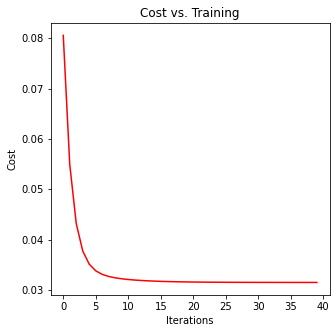

In [9]:
X,Y,data = redData(pathcsv)

# calcule theta by gradientDescent
theta = np.matrix(np.zeros(X.shape[1]))
print('theta 0:',theta)
alpha = 0.9
print('alpha:',alpha)
iters = 40
print('iters:',iters)
thetaGD, costs = gradientDescent(X, Y, theta, alpha, iters)

print('theta of gradientDescent :',thetaGD)
print('cost  of gradientDescent :',cost_function(X, Y, thetaGD))

plot_cost(costs)

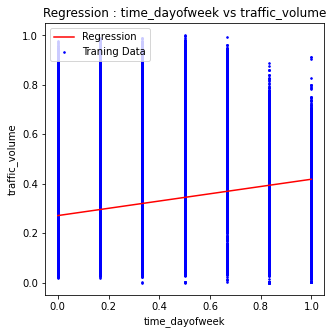

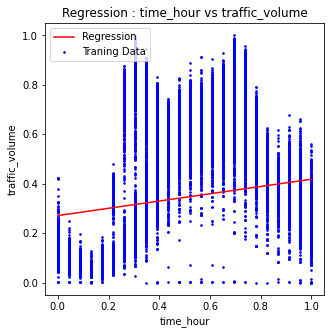

In [10]:
plotOne(data,thetaGD,'time_dayofweek','traffic_volume')
plotOne(data,thetaGD,'time_hour','traffic_volume')

# normal Equation

### normal Equation

In [11]:
def normalEquation(X,Y):
    XT=X.T
    XTX=XT@X
    inv=np.linalg.pinv(XTX)
    theta=(inv@XT)@Y
    return theta

In [12]:
X,Y,data = redData(pathcsv)
thetaNE = normalEquation(X,Y).T

print('theta of normal Equation  :',thetaNE)
print('cost  of normal Equation  :',cost_function(X, Y, thetaNE))

theta of normal Equation  : [[ 0.27918085  0.13333485 -0.12065419  0.30856424]]
cost  of normal Equation  : 0.031481790638160256


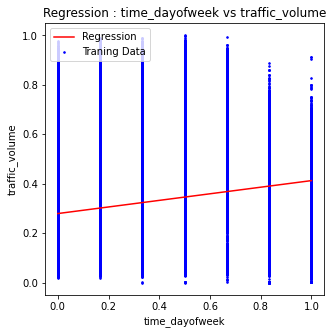

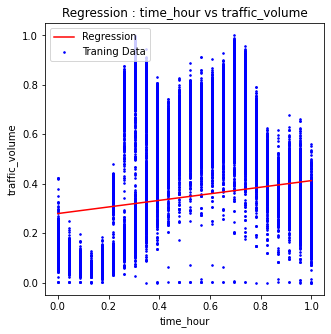

In [13]:
plotOne(data,thetaNE,'time_dayofweek','traffic_volume')
plotOne(data,thetaNE,'time_hour','traffic_volume')

In [14]:
costGD= cost_function(X, Y, thetaGD)
costNE= cost_function(X, Y, thetaNE)
if(costGD < costNE):
    print("gradient Descent is best")
else:
    print("normal Equation is best")

normal Equation is best
